In [ ]:
# Web scraping (Kyle, due 02/26/2021)
#     BeautifulSoup for web scraping

from urllib.request import urlopen
from bs4 import BeautifulSoup
from google.colab import files
import pandas as pd
import io
import numpy as np
import dateutil
from dateutil import parser
import textblob
from textblob import TextBlob
import nltk
import requests
from textblob import Word
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

# upload file
#uploaded = files.upload()
#read array
#df2 = pd.read_csv(io.BytesIO(uploaded['logs - Sheet1.csv']))
#turn to flat list
#array_pages = df2.to_numpy()
#array_pages = np.ndarray.tolist(array_pages)
#array_pages = [item for sublist in array_pages for item in sublist]

#url core needed to pull
website = "https://gcsweb-ci.apps.ci.l2s4.p1.openshiftapps.com"
base = "https://gcsweb-ci.apps.ci.l2s4.p1.openshiftapps.com/gcs/origin-ci-test/logs/canary-release-openshift-origin-installer-e2e-aws-4.5-cnv/"
ending = "build-log.txt"
url = "https://gcsweb-ci.apps.ci.l2s4.p1.openshiftapps.com/gcs/origin-ci-test/logs/canary-release-openshift-origin-installer-e2e-aws-4.5-cnv/1300557127638585344/build-log.txt"
page = requests.get(base)    
data = page.text
soup = BeautifulSoup(data)
links = []
for link in soup.find_all('a'):
    links.append(link.get('href'))
links = links[1:-1]

final_array = []
# create array of urls
for x in range(len(links)):
  final_array.append(str(website) + str(links[x]) + str(ending))


# pull all urls logs and store in 2-d array where array_of_logs[x] is a build-log file and 
# array_of_logs[x][y] is an individual log line split by new line
array_of_logs = []
for x in range(len(final_array)):
  page = urlopen(final_array[x])
  html_bytes = page.read()
  array_of_logs.append(str(html_bytes).split('\\n'))
  
# first log
print(array_of_logs[0])


# Analysis on the log data. Trying to find a framework. API (Ningxiao, Parker, Tianze, Hong)
#     Identify limitations with data and potential risks of achieving project goals.


# ******* Tianze *******
#ignore useless "Waiting for setup to finish..."
def ignoreWaiting(logs):
  for i in range(len(logs)):
    if "Waiting for setup to finish..." in logs[i]:
      logs[i]=""
  return logs
# ******* Tianze *******


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
["b'2020/09/26 22:20:37 ci-operator version v20200924-c41f44a", '2020/09/26 22:20:37 No source defined', '2020/09/26 22:20:37 Resolved release latest to registry.svc.ci.openshift.org/ocp/release:4.5-ci', '2020/09/26 22:20:37 Using namespace https://console.svc.ci.openshift.org/k8s/cluster/projects/ci-op-xl3p51qp', '2020/09/26 22:20:37 Running [release-inputs], [images], [release:latest], e2e-aws', '2020/09/26 22:20:37 Creating namespace ci-op-xl3p51qp', '2020/09/26 22:20:37 Setting up pipeline imagestream for the test', '2020/09/26 22:20:37 Created secret e2e-aws-cnv-cluster-profile', '2020/09/26 22:20:37 Created secret pull-secret', '2020/09/26 22:20:37 Created PDB for pods with openshift.io/build.name label', '2020/09/26 22:20:37 Created PDB for pods with created-by-ci label', '2020/09/26 22:20:37 Tagged shared images from ocp/4.5:${component}, images will be pullable from regist

In [ ]:
#url core needed to pull
website2 = "https://gcsweb-ci.apps.ci.l2s4.p1.openshiftapps.com"
base2 = "https://gcsweb-ci.apps.ci.l2s4.p1.openshiftapps.com/gcs/origin-ci-test/logs/release-openshift-ocp-installer-e2e-aws-serial-4.1/"
ending2 = "build-log.txt"
page2 = requests.get(base2)    
data2 = page2.text
soup2 = BeautifulSoup(data2)
links2 = []
for link2 in soup2.find_all('a'):
    links2.append(link2.get('href'))
links2 = links2[1:-1]

final_array2 = []
# create array of urls
for x in range(len(links2)):
  final_array2.append(str(website2) + str(links2[x]) + str(ending2))


# pull all urls logs and store in 2-d array where array_of_logs[x] is a build-log file and 
# array_of_logs[x][y] is an individual log line split by new line
array_of_logs2 = []
for x in range(len(final_array2)):
  page2 = urlopen(final_array2[x])
  html_bytes2 = page2.read()
  array_of_logs2.append(str(html_bytes2).split('\\n'))
  
# first log
print(array_of_logs2[0])


# Analysis on the log data. Trying to find a framework. API (Ningxiao, Parker, Tianze, Hong)
#     Identify limitations with data and potential risks of achieving project goals.


# ******* Tianze *******
#ignore useless "Waiting for setup to finish..."
def ignoreWaiting(logs):
  for i in range(len(logs)):
    if "Waiting for setup to finish..." in logs[i]:
      logs[i]=""
  return logs
# ******* Tianze *******


["b'2020/09/26 21:56:38 ci-operator version v20200924-c41f44a", '2020/09/26 21:56:38 No source defined', '2020/09/26 21:56:38 Resolved release latest to registry.svc.ci.openshift.org/ocp/release:4.1', '2020/09/26 21:56:38 Using namespace https://console.svc.ci.openshift.org/k8s/cluster/projects/ci-op-l3h5nrkw', '2020/09/26 21:56:38 Running [release-inputs], [images], [release:latest], e2e-aws-serial', '2020/09/26 21:56:38 Creating namespace ci-op-l3h5nrkw', '2020/09/26 21:56:38 Setting up pipeline imagestream for the test', '2020/09/26 21:56:38 Created secret e2e-aws-serial-cluster-profile', '2020/09/26 21:56:38 Created secret pull-secret', '2020/09/26 21:56:38 Created PDB for pods with openshift.io/build.name label', '2020/09/26 21:56:38 Created PDB for pods with created-by-ci label', '2020/09/26 21:56:38 Tagged shared images from ocp/4.1:${component}, images will be pullable from registry.svc.ci.openshift.org/ci-op-l3h5nrkw/stable:${component}', '2020/09/26 21:56:41 Importing release

In [ ]:
# ******* PARKER *******
#  helper function detecting if a string is a date / timestamp
def is_date(str):
  try:
    dateutil.parser.parse(str)
    return True
  except:
    return False

# logs variable contains all parsed logs
logs = []
for i in range(len(array_of_logs2)):
  #  removing newline characters
  array_of_logs2[i] = str(array_of_logs[i]).splitlines()
  array_of_logs2[i] = str(array_of_logs[i]).replace('\\n', ' ')
  

# removes leading 'b from log
  array_of_logs2[i] = array_of_logs[i][0][2:]
# splitting each section as its own index (for parsing)
  array_of_logs2[i] = str(array_of_logs[i]).split(' ')

#  tmp is log without timestamps
  tmp = []
  for j in range(len(array_of_logs2[i])):
    if is_date(array_of_logs2[i][j]) == False:
      tmp.append(array_of_logs2[i][j])
    else:
      continue
  logs.append(tmp)

# removes whitespace characters and keeps root words
stemmer = SnowballStemmer("english")
for log in logs:
  log[:] = [stemmer.stem(x) for x in log if x != '']

IndexError: ignored

In [ ]:
import drain3
from drain3 import TemplateMiner
import json
import logging
import sys
from drain3.kafka_persistence import KafkaPersistence

template_miner = TemplateMiner(None)
i = 0
array_of_logs2 = array_of_logs2[:100]
while True:
    if i >= len(array_of_logs2):
      break
    log_line = ' '.join(array_of_logs2[i])
    i += 1
    if log_line == 'q':
        break
    result = template_miner.add_log_message(log_line)
    result_json = json.dumps(result)
    print(result_json)

print("Clusters:")
for cluster in template_miner.drain.clusters:
    print(cluster)

config file not found: drain3.ini


{"change_type": "cluster_created", "cluster_id": 1, "cluster_size": 1, "template_mined": "b'2020/09/26 21:56:38 ci-operator version v20200924-c41f44a 2020/09/26 21:56:38 No source defined 2020/09/26 21:56:38 Resolved release latest to registry.svc.ci.openshift.org/ocp/release:4.1 2020/09/26 21:56:38 Using namespace https://console.svc.ci.openshift.org/k8s/cluster/projects/ci-op-l3h5nrkw 2020/09/26 21:56:38 Running [release-inputs], [images], [release:latest], e2e-aws-serial 2020/09/26 21:56:38 Creating namespace ci-op-l3h5nrkw 2020/09/26 21:56:38 Setting up pipeline imagestream for the test 2020/09/26 21:56:38 Created secret e2e-aws-serial-cluster-profile 2020/09/26 21:56:38 Created secret pull-secret 2020/09/26 21:56:38 Created PDB for pods with openshift.io/build.name label 2020/09/26 21:56:38 Created PDB for pods with created-by-ci label 2020/09/26 21:56:38 Tagged shared images from ocp/4.1:${component}, images will be pullable from registry.svc.ci.openshift.org/ci-op-l3h5nrkw/stabl

In [ ]:
!pip3 install drain3
!pip3 install kafka-python
!pip3 install redis

  Created wheel for drain3: filename=drain3-0.9.3-cp37-none-any.whl size=16397 sha256=45206756c6e0a71f947270578298db4f7a0c4e53b9ebb00c7455890c77c0b6d1
  Stored in directory: /root/.cache/pip/wheels/44/eb/c8/0c42c729fa7f47040d8b9bc2e8359a96fee8a4b2bf442fd924
Successfully built drain3
     |████████████████████████████████| 256kB 9.2MB/s 
     |████████████████████████████████| 81kB 4.7MB/s 


The cell below runs the drain3 program. Process the log info and generate clusters and a prefix tree of the log information.

In [ ]:
import subprocess
import time

logger = logging.getLogger(__name__)
logging.basicConfig(stream=sys.stdout, level=logging.INFO, format='%(message)s')

template_miner = TemplateMiner()

line_count = 0
start_time = time.time()
batch_start_time = start_time
batch_size = 10000
for i in range(len(array_of_logs2)):
  for line in array_of_logs2[i]:
      line = line.rstrip()
      line = line.partition(": ")[2]
      result = template_miner.add_log_message(line)
      line_count += 1
      if line_count % batch_size == 0:
          time_took = time.time() - batch_start_time
          rate = batch_size / time_took
          logger.info(f"Processing line: {line_count}, rate {rate:.1f} lines/sec, "
                      f"{len(template_miner.drain.clusters)} clusters so far.")
          batch_start_time = time.time()
      if result["change_type"] != "none":
          result_json = json.dumps(result)
          logger.info(f"Input ({line_count}): " + line)
          logger.info("Result: " + result_json)

time_took = time.time() - start_time
rate = line_count / time_took
logger.info(f"--- Done processing file. Total of {line_count} lines, rate {rate:.1f} lines/sec, "
            f"{len(template_miner.drain.clusters)} clusters")
sorted_clusters = sorted(template_miner.drain.clusters, key=lambda it: it.size, reverse=True)
for cluster in sorted_clusters:
    logger.info(cluster)

print("Prefix Tree:")
template_miner.drain.print_tree()

template_miner.profiler.report(0)

Starting Drain3 template miner
Loading configuration from drain3.ini
config file not found: drain3.ini
Input (1): 
Result: {"change_type": "cluster_created", "cluster_id": 1, "cluster_size": 1, "template_mined": "", "cluster_count": 1}
Processing line: 10000, rate 118121.1 lines/sec, 1 clusters so far.
Processing line: 20000, rate 128148.2 lines/sec, 1 clusters so far.
Processing line: 30000, rate 144391.2 lines/sec, 1 clusters so far.
Processing line: 40000, rate 138624.0 lines/sec, 1 clusters so far.
Processing line: 50000, rate 135807.4 lines/sec, 1 clusters so far.
Processing line: 60000, rate 134098.0 lines/sec, 1 clusters so far.
Processing line: 70000, rate 135249.5 lines/sec, 1 clusters so far.
Processing line: 80000, rate 129770.2 lines/sec, 1 clusters so far.
Processing line: 90000, rate 134272.3 lines/sec, 1 clusters so far.
Processing line: 100000, rate 140000.5 lines/sec, 1 clusters so far.
Processing line: 110000, rate 132182.7 lines/sec, 1 clusters so far.
Processing lin

This cell removes dates and timestamps, whitespace and keeps the stems of words

> Indented block



In [ ]:
# ******* PARKER *******
failures = []
successes = []
# word order for matrix: 0: fail, 1: error, 2: success, 3: run, 4: crashloopbackoff
word_matrix = []
for log in logs:
  tmp = ' '.join(log)
  tmp = TextBlob(tmp)
  fail = tmp.word_counts['fail']
  error = tmp.word_counts['error']
  success = tmp.word_counts['success']
  run = tmp.word_counts['run']
  crash = tmp.word_counts['crashloopbackoff']
  word_matrix.append([fail, error, success, run, crash])

# remove noise
word_matrix = word_matrix[2:]

This cell creates a matrix of keywords. each row is a single log entry and each column is a specific keyword

In [ ]:
# ******* PARKER *******
import math
# Latent Semantic Analysis approach

num_of_docs = [0 for i in range(len(word_matrix[0]))]
for i in range(len(word_matrix)):
  for j in range(len(word_matrix[i])):
    if word_matrix[i][j] != 0:
      num_of_docs[j] += 1
for i in range(len(word_matrix)):
  for j in range(len(word_matrix[i])):
    tf = word_matrix[i][j]
    idf = math.log(len(word_matrix) / num_of_docs[j])
    word_matrix[i][j] = tf * idf

# TODO: try to implement anomaly detection with word matrix

[[0.023530497410194036, 0.0, 0.05848019881595618, 0.0, 0.0], [0.023530497410194036, 0.0, 0.05848019881595618, 0.0, 0.0], [0.023530497410194036, 0.0, 0.05848019881595618, 0.0, 0.0], [0.023530497410194036, 0.0, 0.05848019881595618, 0.0, 0.0], [0.023530497410194036, 0.0, 0.05848019881595618, 0.0, 0.0], [0.21177447669174632, 0.41928699106748313, 0.023392079526382472, 0.0, 0.0], [0.07059149223058211, 0.29949070790534504, 0.2924009940797809, 0.0, 1.5756171428283539], [0.07059149223058211, 0.5390832742296211, 0.2924009940797809, 0.0, 0.0], [0.07059149223058211, 0.4791851326485521, 0.30409703384297215, 0.0, 0.39390428570708846], [0.07059149223058211, 0.4791851326485521, 0.30409703384297215, 0.0, 0.39390428570708846], [0.07059149223058211, 0.29949070790534504, 0.2924009940797809, 0.0, 1.5756171428283539], [0.0, 0.059898141581069014, 0.0, 0.0, 0.0], [0.04706099482038807, 0.29949070790534504, 0.2924009940797809, 0.0, 1.5756171428283539], [0.04706099482038807, 0.29949070790534504, 0.29240099407978

This cell is determining the number of keywords in each log and plotting them.
TODO: look at logs and find more keywords, instead of failures and successes make each word an entry in a matrix and use SVD to plot similarities

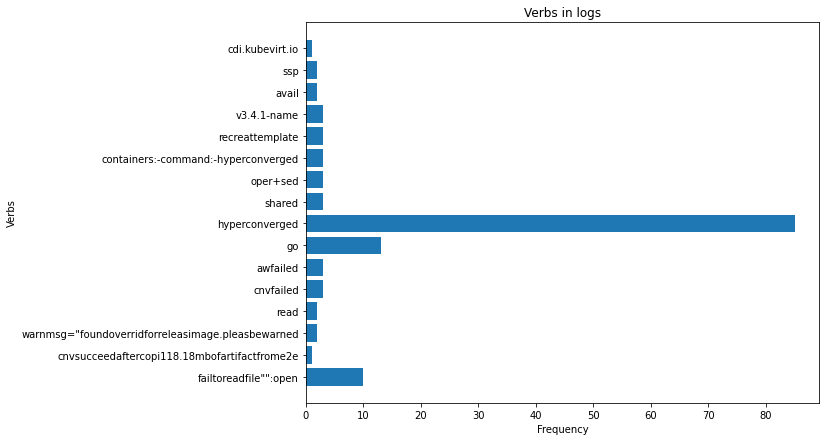

In [ ]:
# ******* NINGXIAO *******
# find events in log, display frequecy of each event in a bar chart
import spacy
s = ""
for log in logs:
    temp = ""
    temp = temp.join(log)
    s += temp
# Error Message: Text of length 5496377 exceeds maximum of 1000000.
s = s[0:100000]
nlp = spacy.load("en_core_web_sm")
doc = nlp(s)
dictionary = {};
for token in doc:
    if token.pos_ == 'VERB':
        if token.text not in dictionary:
            dictionary[token.text] = 1
        else:
            dictionary[token.text] += 1
    #print(token.text, toekn.pos_)

#print(dictionary)

keys = list(dictionary.keys())
values = list(dictionary.values())

fig, ax = plt.subplots(figsize=(9.2, 7))  
ax.barh(keys,values)
plt.title('Verbs in logs')
plt.ylabel('Verbs')
plt.xlabel('Frequency')

plt.show()

The image above shows the verbs and their frequency appear in the tokenized log text. It indicates what event and how often it happens in the log.